<a href="https://colab.research.google.com/github/xndtmfdl/codetree-TILs/blob/main/credit_fraud_detection_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jermond","key":"01ed2a182651779b826aee1a4194ca97"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


kaggle은 kaggle.json 파일을 통해 계정인증을 수행한다.

In [3]:
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 61% 40.0M/66.0M [00:00<00:00, 414MB/s]
100% 66.0M/66.0M [00:00<00:00, 507MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

In [5]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

*먼저 데이터를 분석한다. 파이썬 내장함수를 활용하여 데이터 분포를 시각화 후 파악하는 것이 좋다.*

# 1. 클래스 분포 확인:

<ipython-input-7-23bf0aa0e8e1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


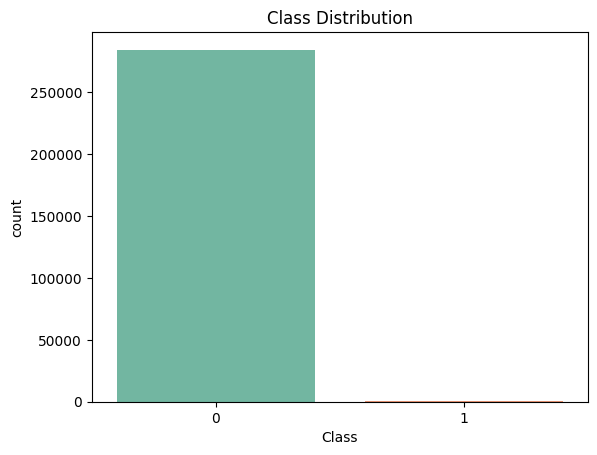

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Class Distribution')
plt.show()

print(df['Class'].value_counts(normalize=True))

# **2. 거래 금액의 분포 확인**

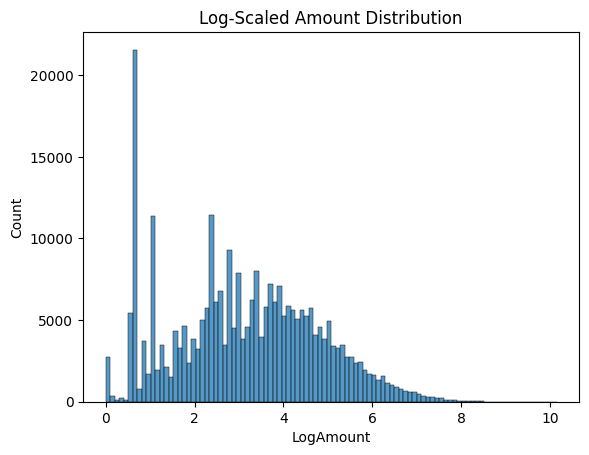

In [8]:
#전체 금액 분포 확인
import numpy as np
df['LogAmount'] = np.log1p(df['Amount'])
sns.histplot(df['LogAmount'], bins=100)
plt.title('Log-Scaled Amount Distribution')
plt.show()

데이터를 보면 특정 금액 구간에서 비정상적으로 빈도수가 높거나 낮은 경우, 특징적인 패턴 등을 볼 수 있다.
log값이 1,2,3인 구간은 소액결제에서 빈번한 트랜잭션이 존재한다는뜻이고, 자동 반복 결제 등으로 의심할 수 있다.
log값이 높은 구간에도 드물게 고액거래가 나올수 있다. 거래 건수가 작으나 금액이 큰 거래인데 실제로 사기 탐지에서는 이상치일 가능성이 높다.

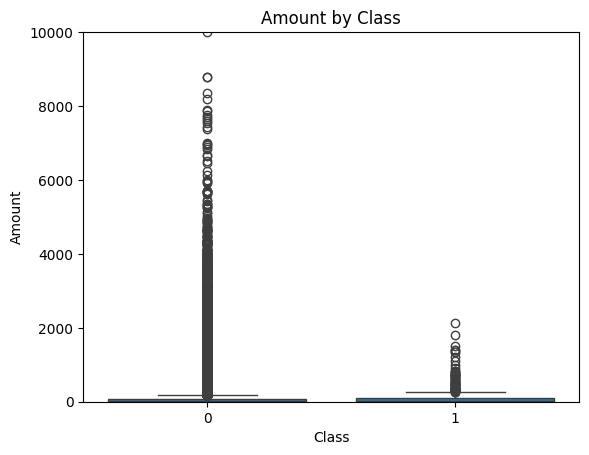

In [9]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount by Class')
plt.ylim(0, 10000)
plt.show()

사기 거래 금액의 분포이다. 전반적으로 금액이 작은 것을 볼 수 있는데 박스의 위치나 길이를 보면 사기 거래는 대부분 1000 이하의 소액이다. 이는 사기 거래가 적발되기 어렵도록 작은 금액으로 다수 반복되는 패턴일 수 있다고 해석할 수 있다. 정상거래에서는 극단적으로 큰 고액이 존재하는데 모델이 이런 특성 때문에 amount 변수에 과하게 의존할 수 있다. 따라서 데이터 로그 변환은 중요한 전처리가 될 수 있다.
과하게 치우친 amount 컬럼의 값을 로그 변환하여 보정해 주면 모델의 성능지표가 상승할 가능성이 있다.

# 3. 거래 시간에 따른 패턴 확인

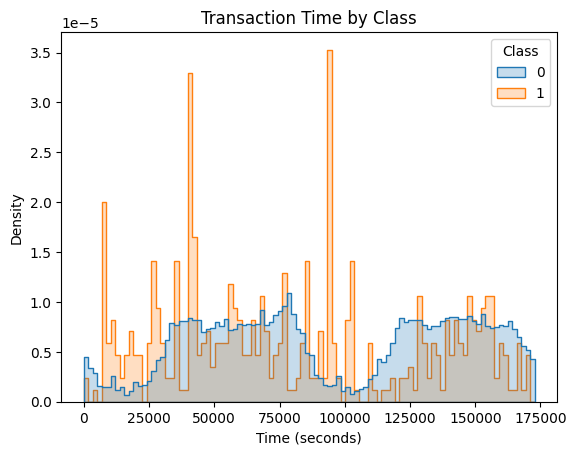

In [10]:
sns.histplot(data=df, x='Time', bins=100, hue='Class', element='step', stat='density', common_norm=False)
plt.title('Transaction Time by Class')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.show()


정상거래(파란색)은 전 구간에 걸쳐 균일한 분포를 이룬다.
그러나 사기거래(주황색)은 특정시간대에 급증한다. 공격자가 정해진 시간에 자동화된 방식으로 거래했을 가능성이 높아진 것으로 볼 수 있다.

클래스 비율이 매우 불균형이다.

*   정상 거래 (Class = 0): 약 99.8%
*   사기 거래 (Class = 1): 약 0.2%

state를 density로 해야 개수 차이를 무시하고 분포 모양 자체를 비교할 수 있다.
common_norm=False로 해야 클래스마다 따로 정규화해서 1%의 사기 거래도 시각화 가능핟.


# 4. Class와 다른 변수들 간의 상관관계 분석

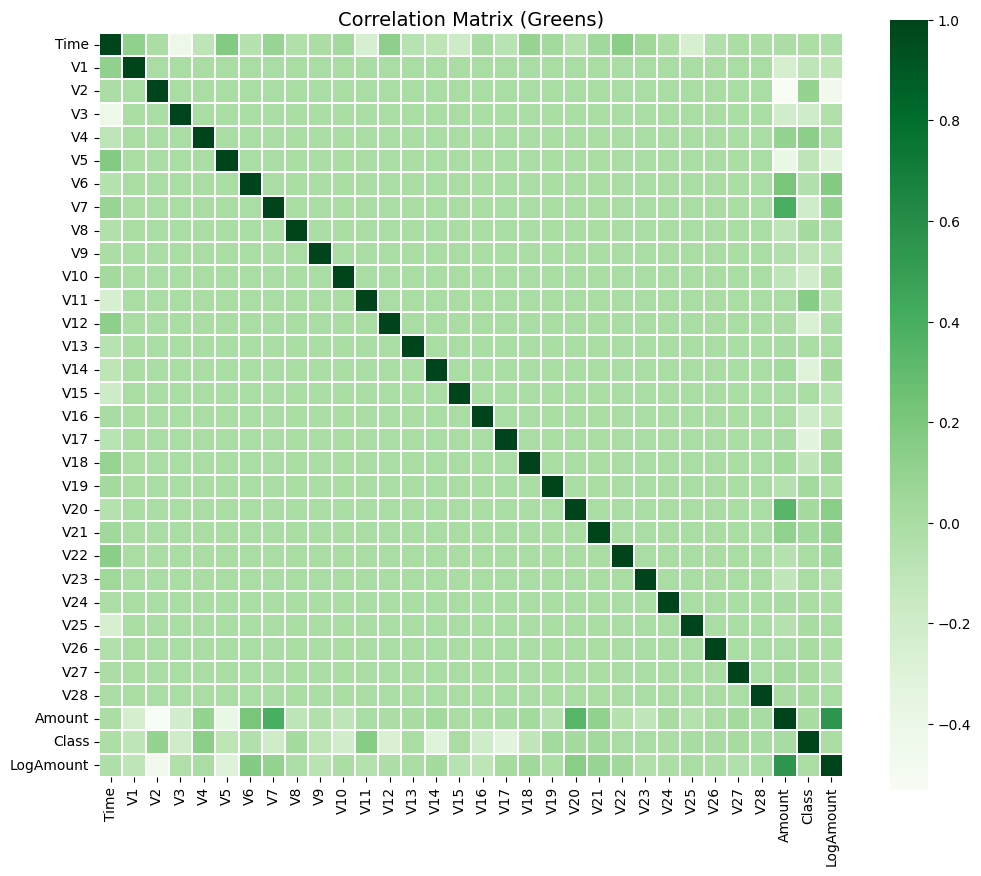

V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V11    0.154876
V4     0.133447
V18   -0.111485
Name: Class, dtype: float64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 계산
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='Greens', linewidths=0.1, square=True)
plt.title('Correlation Matrix (Greens)', fontsize=14)
plt.show()

# Class와의 상관계수만 뽑아서 정렬
class_corr = df.corr()['Class'].drop('Class')  # 자기 자신은 제외
print(class_corr.sort_values(key=abs, ascending=False).head(10))  # 절댓값 기준 정렬


모델 학습 전에 어떤 변수들이 class와 관련있는지 상관계수로 파악한다.
+1에 가까울수록 두 변수는 강한 양의 상관을 가진다 한쪽이 증가하면 다른 쪽도 증가한다.
-1에 가까울수록 강한 음의 상관을 가진다. 한쪽이 증가하면 다른 쪽은 감소한다.
상관관계를 보면 사기 거래는 특정 변수값이 매우 낮거나 높을때 자주 발생하는 패턴이 보인다. 절댓값이 클수록 사기 탐지에 민감하게 반응 하는 변수이다.


# **언더 샘플링**

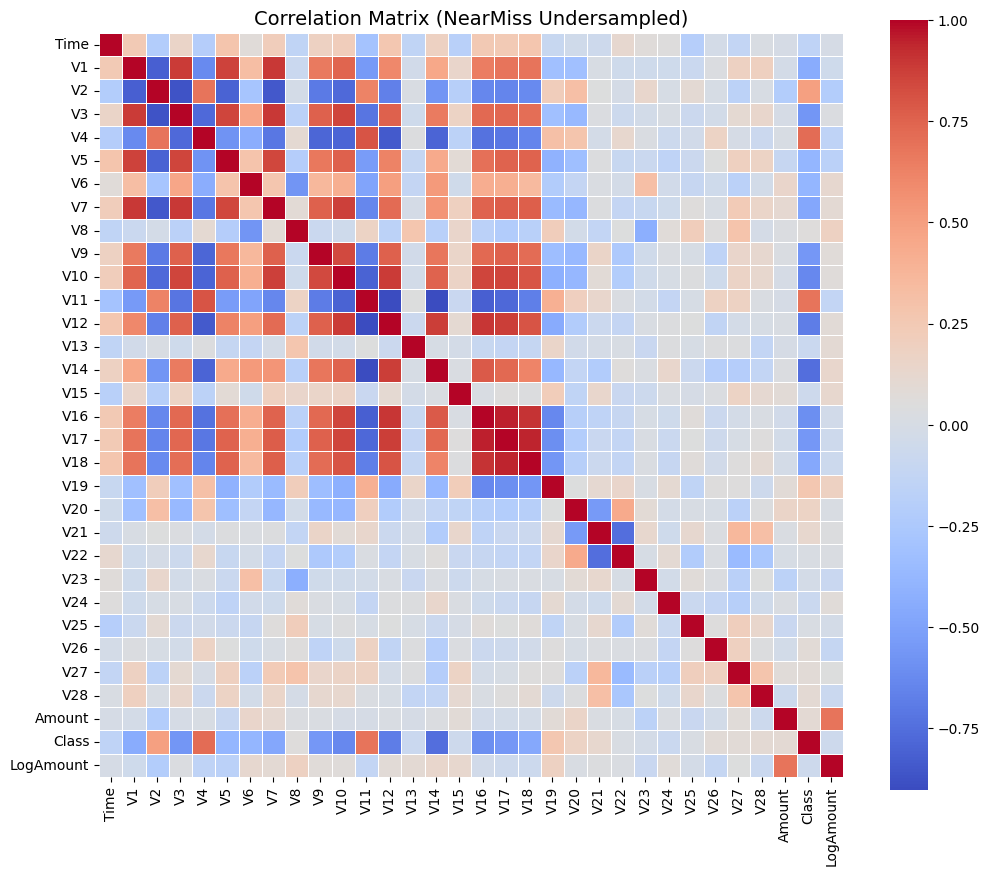

In [12]:
# 언더샘플링된 balanced 데이터셋 생성
fraud_df = df[df['Class'] == 1]
nonfraud_df = df[df['Class'] == 0].sample(n=len(fraud_df), random_state=42)
balanced_df = pd.concat([fraud_df, nonfraud_df]).sample(frac=1, random_state=42)

# 언더샘플링 상관행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(balanced_df.corr(), cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Matrix (NearMiss Undersampled)', fontsize=14)
plt.show()


원본 데이터는 사기 클래스가 너무 비율이 작아서 상관계수가 약해질 수 있다. 언더샘플링을 하여 사기 클래스의 특성을 중심으로 변수들이 구성되므로 상관관계가 더 명확해진다

<ipython-input-13-ddffcc3d1f21>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=feature, data=df, palette='Set2')
<ipython-input-13-ddffcc3d1f21>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=feature, data=df, palette='Set2')
<ipython-input-13-ddffcc3d1f21>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=feature, data=df, palette='Set2')


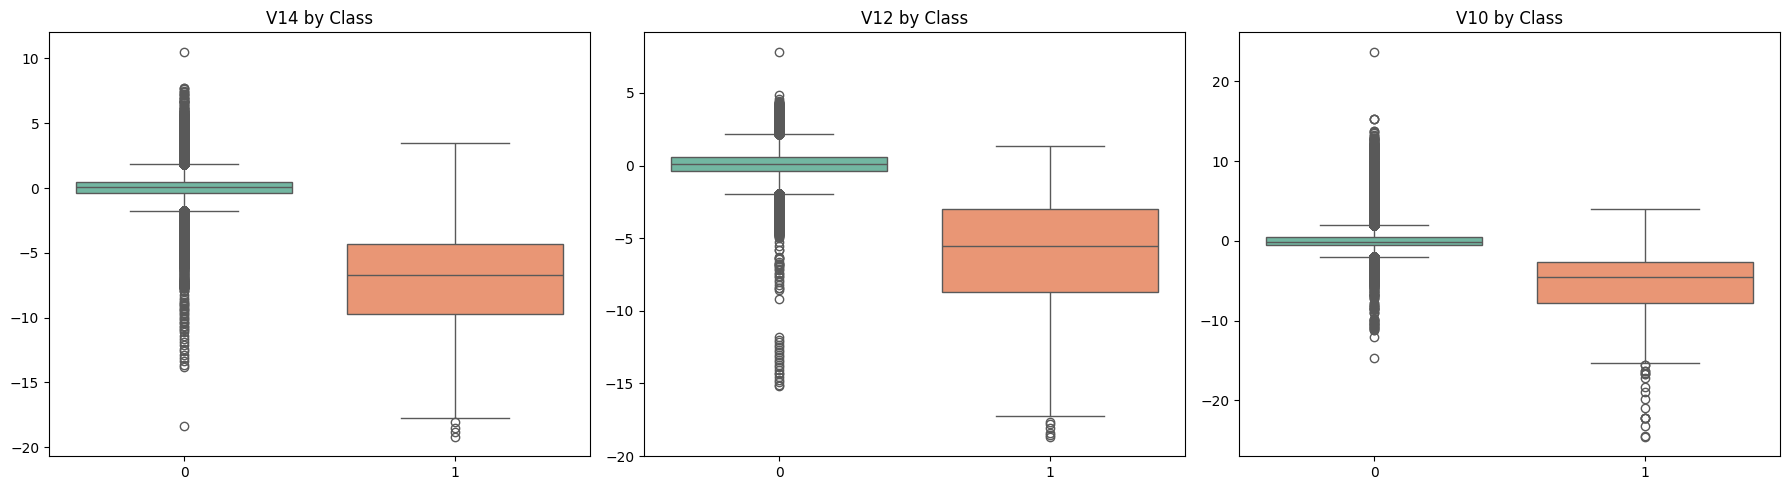

In [13]:
# Class와 상관관계가 높은 주요 변수들 박스플롯
plt.figure(figsize=(18, 5))

features = ['V14', 'V12', 'V10']
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Class', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} by Class')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


변수 순서대로 이후 모델 학습에서 다양한 경우에 반복적으로 split 기준이 되어 성능 향상에 기여했기 때문에 선택하였다.
v14, v10은 정상거래와 달리 사기 거래에서 크게 음수 방향으로 치우친 분포를 보이며 강한 구분 신호를 제공한다.
이는 트리 모델에서 노드를 나누는 주요한 기준이 된다.

# **데이터 전처리**

In [14]:
from sklearn.preprocessing import RobustScaler

# 데이터 복사 (원본 보호용)
df_model = df.copy()

# RobustScaler는 이상치 영향이 적음, 사기 탐지에 유리
rob_scaler = RobustScaler()
df_model['scaled_amount'] = rob_scaler.fit_transform(df_model['Amount'].values.reshape(-1, 1))
df_model['scaled_time'] = rob_scaler.fit_transform(df_model['Time'].values.reshape(-1, 1))

# 기존 Amount, Time 제거하고 scaled 컬럼 앞으로 이동
df_model.drop(['Amount', 'Time'], axis=1, inplace=True)
df_model.insert(0, 'scaled_amount', df_model.pop('scaled_amount'))
df_model.insert(1, 'scaled_time', df_model.pop('scaled_time'))



print("스케일링 완료 후 데이터프레임")
display(df_model.head())
print("\n 수치 요약")
display(df_model[['scaled_amount', 'scaled_time']].describe())


스케일링 완료 후 데이터프레임


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,LogAmount
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539



 수치 요약


,scaled_amount,scaled_time
count,284807.000000,284807.000000
mean,0.927124,0.118914
std,3.495006,0.557903
min,-0.307413,-0.994983
25%,-0.229162,-0.358210
50%,0.000000,0.000000
75%,0.770838,0.641790
max,358.683155,1.035022


standardScaler는 이상치에 민감한데 robustScaler는 중앙값과 iqr을 기준으로 스케일링하기 때문에 이상치 영향을 최소화 하기 때문에 선택했다.

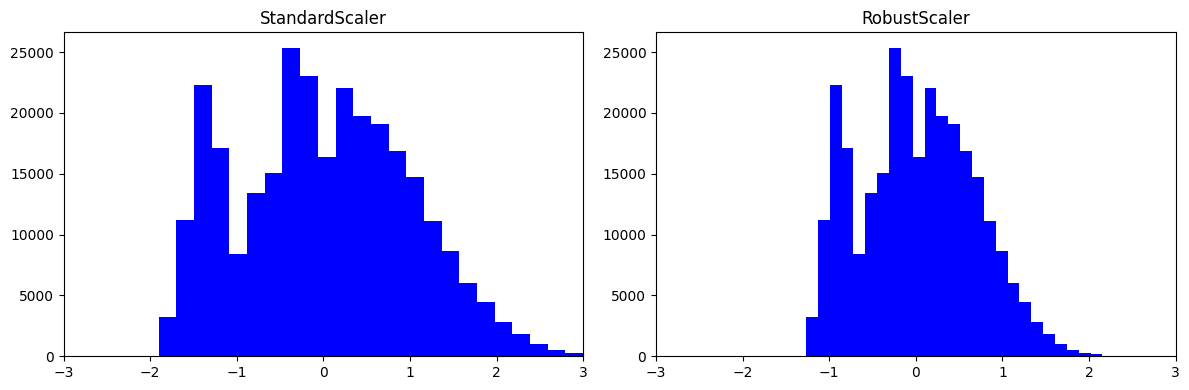

In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

scaled_std = std_scaler.fit_transform(df_model['LogAmount'].values.reshape(-1, 1))
scaled_rob = rob_scaler.fit_transform(df_model['LogAmount'].values.reshape(-1, 1))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(scaled_std, bins=30, color='blue')
plt.title('StandardScaler')
plt.xlim(-3, 3)
plt.grid(False)

plt.subplot(1, 2, 2)
plt.hist(scaled_rob, bins=30, color='blue')
plt.title('RobustScaler')
plt.xlim(-3, 3)
plt.grid(False)

plt.tight_layout()
plt.show()


이상거래 탐지 시스템에서 이상치는 우리가 탐지하고 싶은 대상(사기 거래)인데 이상치의 영향을 받지 않는 스케일링은 모순처럼 보일 수 있다.
이상거래 탐지는 보통 전체 거래 중 소수의 비정상적인 패턴을 찾는 것이 목표이다. 즉 이상치 자체를 찾아내는 것이 중요한데 스케일링에서 이상치의 영향을 받지 않는 다는 것은 StandardSacler처럼 평균과 표준편차를 사용하는 방식은 극단적인 값이 전체 스케일링 결과를 왜곡할 수 있다. 이러면 정상데이터조차 스케일이 이상해지고 모델 학습 성능이 떨어질 수 있다.
RobustScaler는 스케일링시에 중앙값을 기준으로 이상치를 무시하고 정상거래 기준으로 스케일을 조정하여 스케일 후에도 이상치가 그대로 탐지되도록 비율을 유지할 수 있다.

# **테이블 분리 및 train/test**

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np

# 이상치 제거 먼저 진행
df_clean = df.copy()
features_to_filter = ['V14', 'V12', 'V10']

for feature in features_to_filter:
    q1, q3 = np.percentile(df_clean[df_clean['Class'] == 1][feature], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # 사기 데이터(Class=1)에 대해서만 이상치 제거
    condition = (df_clean['Class'] == 1) & ((df_clean[feature] < lower_bound) | (df_clean[feature] > upper_bound))
    df_clean = df_clean.drop(index=df_clean[condition].index)

# 이후 전처리 및 모델용 데이터 생성
df_model = df_clean.copy()

x = df_model.drop(columns=['Class'])
y = df_model['Class']


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

# train 데이터에서 validation set 추가 분할 (20% 비율)
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# 정보 출력
print(f"Train data: {len(x_train)}")
print(f"Validation data: {len(x_val)}")
print(f"Test data: {len(x_test)}")

print(f"\n사기 비율 (train):\n{y_train.value_counts(normalize=True)}")
print(f"\n사기 비율 (val):\n{y_val.value_counts(normalize=True)}")
print(f"\n사기 비율 (test):\n{y_test.value_counts(normalize=True)}")


Train data: 227817
Validation data: 45564
Test data: 56955

사기 비율 (train):
Class
0    0.998393
1    0.001607
Name: proportion, dtype: float64

사기 비율 (val):
Class
0    0.998398
1    0.001602
Name: proportion, dtype: float64

사기 비율 (test):
Class
0    0.998402
1    0.001598
Name: proportion, dtype: float64


전체 사기 거래 중 일부는 너무 특이하거나 극단적인 값을 가지고 있을수 있기 때문에 모델이 일반적인 사기 거래 패턴을 잡아내지 못할 가능성이 높다. 따라서 너무 튀는 사기 데이터는 제외시켜 데이터의 일반성을 높이는 것이 좋다.

In [17]:
df_model

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,LogAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0.570980
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,3.249987
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,4.232366
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,2.397895


# **클래스 불균형 처리**

In [18]:
from imblearn.under_sampling import NearMiss
from collections import Counter

# 언더샘플링 적용
nm = NearMiss()
x_train_under, y_train_under = nm.fit_resample(x_train, y_train)

print('언더샘플링 적용 후 클래스 분포:', Counter(y_train_under))


언더샘플링 적용 후 클래스 분포: Counter({0: 366, 1: 366})


다수의 클래스의 데이터를 줄여서 소수 클래스와 균형을 맞추는 언더샘플링이다. nearmiss는 다수 클래스 중에서도 소수 클래스와 가까운 데이터들만 선택해서 학습에 사용한다.
이는 데이터 수가 줄어들어 학습속도가 빨라지고 과적합 방지에 좋으나 정상거래 데이터 대부분을 버려 정보손실 발생하고 모델의 학습 일반화 성능이 낮아질 수 있다.

In [19]:
from imblearn.over_sampling import SMOTE

# 오버샘플링 적용
sm = SMOTE(random_state=42)
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)

print('오버샘플링 적용 후 클래스 분포:', Counter(y_train_over))


오버샘플링 적용 후 클래스 분포: Counter({0: 227451, 1: 227451})


소수 클래스를 인위적으로 생성하여 데이터 개수를 맞춘다. 소수 클래스 간의 벡터 공간에서 유사한 가짜 데이터를 생성하여 다수 클래스의 데이터와 개수를 맞춘다.
원래 데이터를 최대한 보존하면서 데이터 균형을 맞출 수 있으나,
가짜 데이터 생성에 의한 noise가 포함될수 있다.

# **XGBBoost 모델 훈련**

1. 불균형 원본 데이터 버전

In [20]:

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score #성능 평가에 필요한 함수

# 클래스 비율 기반 가중치 계산
weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb = XGBClassifier(
    scale_pos_weight=weight,
    random_state=42,
    eval_metric='logloss',
)

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
y_proba = xgb.predict_proba(x_test)[:,1]

print("[XGBoost - 불균형 데이터]")
print(" Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\n Classification Report")
print(classification_report(y_test, y_pred, digits=4))

print("\n ROC-AUC Score")
print(roc_auc_score(y_test, y_proba))


[XGBoost - 불균형 데이터]
 Confusion Matrix
[[56854    10]
 [    8    83]]

 Classification Report
              precision    recall  f1-score   support

           0     0.9999    0.9998    0.9998     56864
           1     0.8925    0.9121    0.9022        91

    accuracy                         0.9997     56955
   macro avg     0.9462    0.9560    0.9510     56955
weighted avg     0.9997    0.9997    0.9997     56955


 ROC-AUC Score
0.9943259645531733


In [21]:

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# 클래스 비율 기반 가중치 계산
weight = y_train_final.value_counts()[0] / y_train_final.value_counts()[1]

xgb_val = XGBClassifier(
    scale_pos_weight=250,
    random_state=42,
    eval_metric='logloss',
    n_estimators=300,
    early_stopping_rounds=20,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8
)

xgb_val.fit(
    x_train_final, y_train_final,
    eval_set=[(x_val, y_val)],
    verbose=True
)

# validation 성능 출력
print("\n[XGBoost - Validation 성능]")
y_val_pred = xgb_val.predict(x_val)
y_val_proba = xgb_val.predict_proba(x_val)[:, 1]
print("Confusion Matrix (Val):")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification Report (Val):")
print(classification_report(y_val, y_val_pred, digits=4))
print("ROC-AUC Score (Val):", roc_auc_score(y_val, y_val_proba))

# test 성능 출력
print("\n[XGBoost - Test 성능]")
y_test_pred = xgb_val.predict(x_test)
y_test_proba = xgb_val.predict_proba(x_test)[:, 1]
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, digits=4))
print("ROC-AUC Score (Test):", roc_auc_score(y_test, y_test_proba))


[0]	validation_0-logloss:0.33754
[1]	validation_0-logloss:0.31948
[2]	validation_0-logloss:0.30263
[3]	validation_0-logloss:0.28631
[4]	validation_0-logloss:0.27133
[5]	validation_0-logloss:0.25734
[6]	validation_0-logloss:0.24393
[7]	validation_0-logloss:0.23198
[8]	validation_0-logloss:0.22039
[9]	validation_0-logloss:0.20961
[10]	validation_0-logloss:0.19936
[11]	validation_0-logloss:0.18931
[12]	validation_0-logloss:0.17981
[13]	validation_0-logloss:0.17146
[14]	validation_0-logloss:0.16353
[15]	validation_0-logloss:0.15554
[16]	validation_0-logloss:0.14850
[17]	validation_0-logloss:0.14133
[18]	validation_0-logloss:0.13457
[19]	validation_0-logloss:0.12815
[20]	validation_0-logloss:0.12221
[21]	validation_0-logloss:0.11630
[22]	validation_0-logloss:0.11085
[23]	validation_0-logloss:0.10574
[24]	validation_0-logloss:0.10075
[25]	validation_0-logloss:0.09595
[26]	validation_0-logloss:0.09174
[27]	validation_0-logloss:0.08748
[28]	validation_0-logloss:0.08329
[29]	validation_0-loglos

validation set은 학습이 이미 완료된 모델을 검증하기 위한 dataset이다. test시에 과적합을 줄이기 위해 사용해야 한다.
test는 모델 개발이 끝난 뒤 오직 성능을 평가하기 위해서만 사용해야 한다.
early_stopping을 사용하는 이유는 validation 성능이 개선되지 않으면 학습을 조기에 종료할 수 있기 때문이다.
너무 오래 학습을 시키면 과적합 가능성이 생기는데 validation에서 성능이 더 좋아지지 않으면 더 학습해봤자 성능이 나빠질 수 있다.
1. scale_pos_weight에서 클래스 불균형 비율을 조정했다.
2. learning_rate = 0.05 학습속도, 낮은 값을 쓰면 모델이 천천히 학습하여 더 정교한 모델이 된다
3. 트리 깊이는 7로 하여 깊이가 깊을수록 복잡한 규칙 학습이 가능핟.
4. subsample=0.8 데이터 샘플 비율, 일부 데이터만 사용해 학습하여 일반화 성능을 향상시킨다.
5. colsample_bytree=0.8, 일부 feature만 사용하여 과적합을 줄인다.


test 데이터는 마지막에 최종적으로 사용되어야 한다.

모델을 학습시키고 test 성능이 나쁘면 파라미터를 보통 바꿔본다 이후 다시 test를 하고 성능을 보며 수치를 바꾸는데 이렇게 반복하다 보면 모델을 test 데이터에 최적화 시킨 셈이 된다. test는 더이상 모르는 데이터가 아니고 시험지를 외워서 푼것과 같은 수치를 보인다.

validation 없이 test에 직접 튜닝한 수치보다 validation을 두고 튜닝후 test에 한번만 평가한 수치가 더 좋게 나온것은,
정말 더 일반화 성능이 좋은 모델을 찾은 것이라고 볼 수 있다.
validation을 넣어서 모델이 과도하게 복잡해지지 않도록 제어되었고, 과적합 없이 모델이 본질적인 패턴을 잘 학습한 경우 오히려 성능이 안정화되어 향상된 것이다.
아니면 우연히 좋은 split이 발견되어 일반화가 잘 된 것이라고도 볼 수 있다.

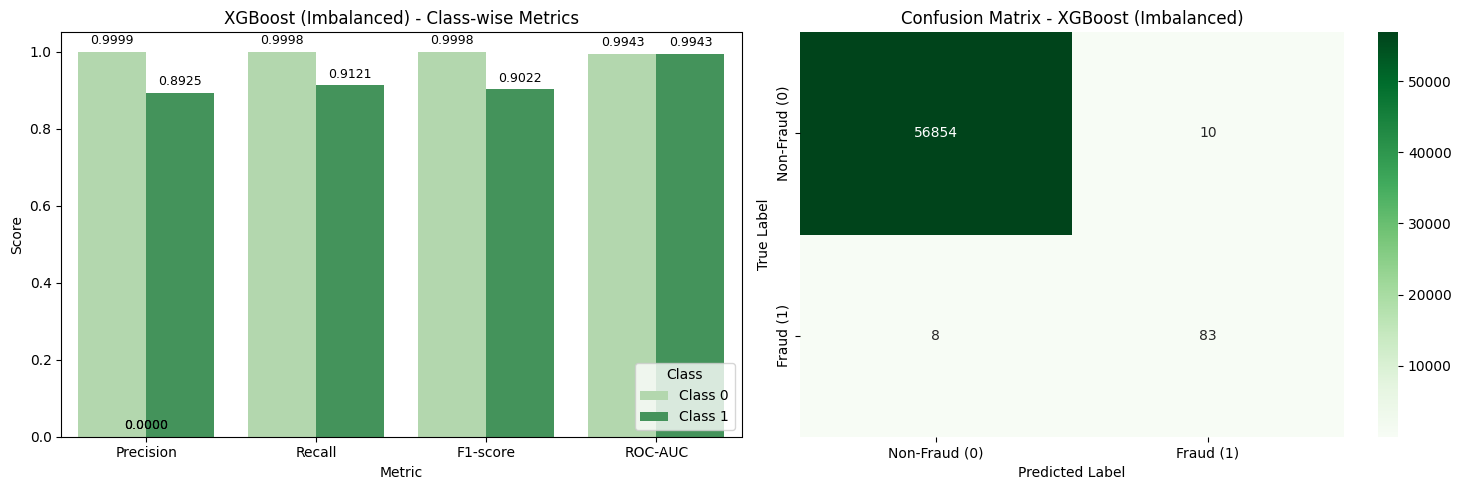

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Class 0': [0.9999, 0.9998, 0.9998, 0.9943],
    'Class 1': [0.8925, 0.9121, 0.9022, 0.9943]
}

df_metrics = pd.DataFrame(metrics_data)

cm = np.array([[56854, 10],
               [8, 83]])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df_melted = df_metrics.melt(id_vars='Metric', var_name='Class', value_name='Score')
bar = sns.barplot(x='Metric', y='Score', hue='Class', data=df_melted, palette='Greens', ax=axes[0])
axes[0].set_ylim(0, 1.05)
axes[0].set_title('XGBoost (Imbalanced) - Class-wise Metrics')

for p in bar.patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.02, f'{height:.4f}', ha="center", fontsize=9)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - XGBoost (Imbalanced)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])
axes[1].set_yticklabels(['Non-Fraud (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()


2. 언더 샘플링 데이터 버전

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

xgb_under = XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)

xgb_under.fit(x_train_under, y_train_under)

y_pred_under = xgb_under.predict(x_test)
y_proba_under = xgb_under.predict_proba(x_test)[:, 1]

print("[XGBoost - 언더샘플링 데이터]")
print(" Confusion Matrix")
print(confusion_matrix(y_test, y_pred_under))

print("\n Classification Report")
print(classification_report(y_test, y_pred_under, digits=4))

print("\n ROC-AUC Score")
print(roc_auc_score(y_test, y_proba_under))


[XGBoost - 언더샘플링 데이터]
 Confusion Matrix
[[31817 25047]
 [    1    90]]

 Classification Report
              precision    recall  f1-score   support

           0     1.0000    0.5595    0.7176     56864
           1     0.0036    0.9890    0.0071        91

    accuracy                         0.5602     56955
   macro avg     0.5018    0.7743    0.3623     56955
weighted avg     0.9984    0.5602    0.7164     56955


 ROC-AUC Score
0.9732471383428052


언더샘플링은 데이터가 너무 작은 정상 거래만 학습한다. x_train_under에 NearMiss에 의해 사기 500개 정상 500개 정도만 존재하는데 이는 모델 입장에서 정상 거래가 굉장히 적은 비중이라고 착각하게 되어 테스트 셋에서 많은 정상 거래를 사기로 잘못 예측했다.

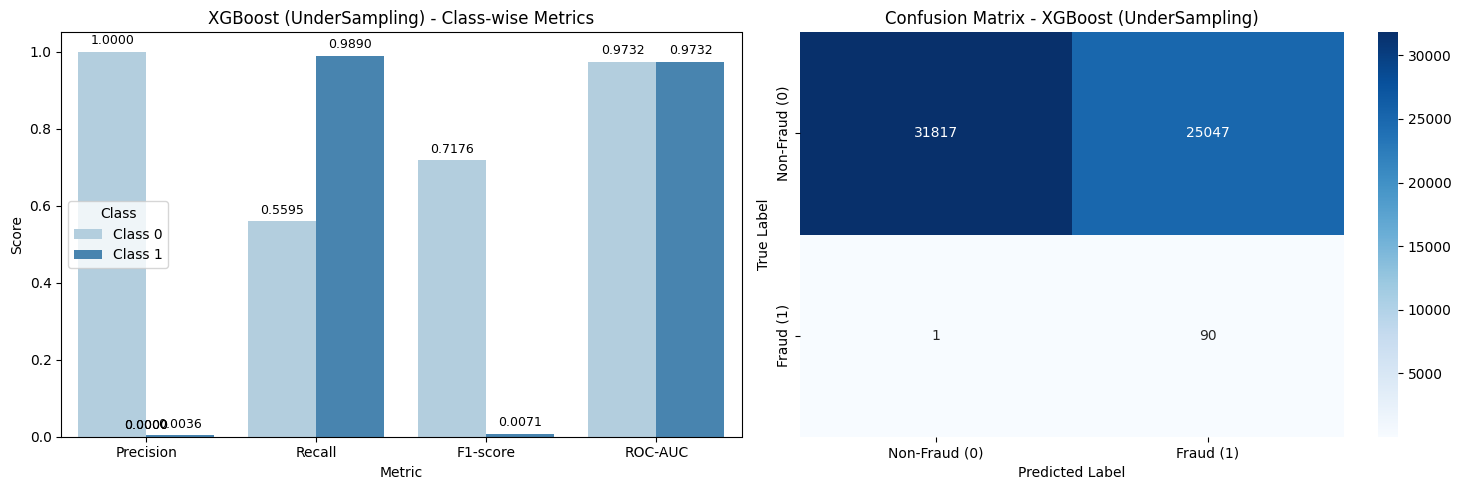

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Class 0': [1.0000, 0.5595, 0.7176, 0.9732],
    'Class 1': [0.0036, 0.9890, 0.0071, 0.9732]
}

df_metrics = pd.DataFrame(metrics_data)

cm = np.array([[31817, 25047],
               [1, 90]])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df_melted = df_metrics.melt(id_vars='Metric', var_name='Class', value_name='Score')
bar = sns.barplot(x='Metric', y='Score', hue='Class', data=df_melted, palette='Blues', ax=axes[0])
axes[0].set_ylim(0, 1.05)
axes[0].set_title('XGBoost (UnderSampling) - Class-wise Metrics')

for p in bar.patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.02, f'{height:.4f}', ha="center", fontsize=9)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - XGBoost (UnderSampling)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])
axes[1].set_yticklabels(['Non-Fraud (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()


3. 오버 샘플링 데이터 버전

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

xgb_over = XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)

xgb_over.fit(x_train_over, y_train_over)

y_pred_over = xgb_over.predict(x_test)
y_proba_over = xgb_over.predict_proba(x_test)[:, 1]

print("[XGBoost - 오버샘플링 데이터 (SMOTE)]")
print(" Confusion Matrix")
print(confusion_matrix(y_test, y_pred_over))

print("\n Classification Report")
print(classification_report(y_test, y_pred_over, digits=4))

print("\n ROC-AUC Score")
print(roc_auc_score(y_test, y_proba_over))


[XGBoost - 오버샘플링 데이터 (SMOTE)]
 Confusion Matrix
[[56839    25]
 [    8    83]]

 Classification Report
              precision    recall  f1-score   support

           0     0.9999    0.9996    0.9997     56864
           1     0.7685    0.9121    0.8342        91

    accuracy                         0.9994     56955
   macro avg     0.8842    0.9558    0.9169     56955
weighted avg     0.9995    0.9994    0.9994     56955


 ROC-AUC Score
0.9867016424768253


오버 샘플링은 합성 데이터를 기반으로 하는데 이는 실제 분포를 왜곡할 가능성이 있다. 너무 유사한 사기 샘플이 추가되면 모델이 일반화에 실패할 수 있다. xgboost같은 모델은 과적합 위험이 있다.

scale_pos_weight 기반 xgboost가 수치가 제일좋음

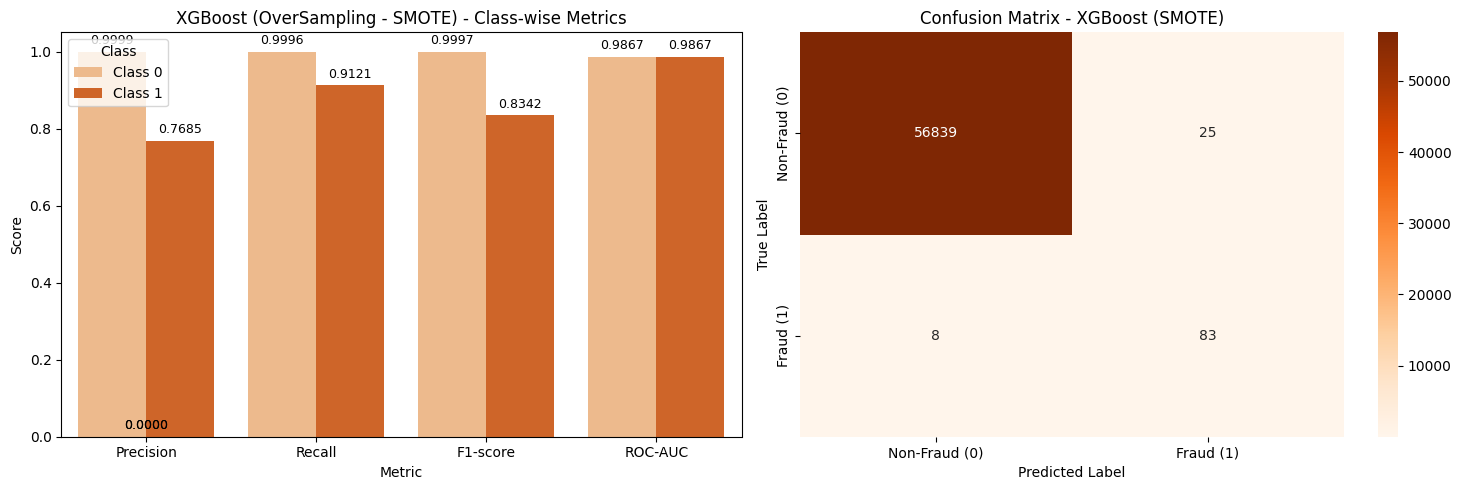

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Class 0': [0.9999, 0.9996, 0.9997, 0.9867],
    'Class 1': [0.7685, 0.9121, 0.8342, 0.9867]
}

df_metrics = pd.DataFrame(metrics_data)

cm = np.array([[56839, 25],
               [8, 83]])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df_melted = df_metrics.melt(id_vars='Metric', var_name='Class', value_name='Score')
bar = sns.barplot(x='Metric', y='Score', hue='Class', data=df_melted, palette='Oranges', ax=axes[0])
axes[0].set_ylim(0, 1.05)
axes[0].set_title('XGBoost (OverSampling - SMOTE) - Class-wise Metrics')

for p in bar.patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.02, f'{height:.4f}', ha="center", fontsize=9)

sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Confusion Matrix - XGBoost (SMOTE)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])
axes[1].set_yticklabels(['Non-Fraud (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()


# **LogisticRegression 모델 분석**

1. 불균형 원본 데이터 버전

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

log_reg = LogisticRegression(max_iter=1500, random_state=42)

log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)
y_proba = log_reg.predict_proba(x_test)[:, 1]  # 사기일 확률

print("[Logistic Regression - 불균형 데이터]")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC-AUC Score")
print(roc_auc_score(y_test, y_proba))


[Logistic Regression - 불균형 데이터]
Confusion Matrix
[[56848    16]
 [   31    60]]

Classification Report
              precision    recall  f1-score   support

           0     0.9995    0.9997    0.9996     56864
           1     0.7895    0.6593    0.7186        91

    accuracy                         0.9992     56955
   macro avg     0.8945    0.8295    0.8591     56955
weighted avg     0.9991    0.9992    0.9991     56955


ROC-AUC Score
0.9862820950855561


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


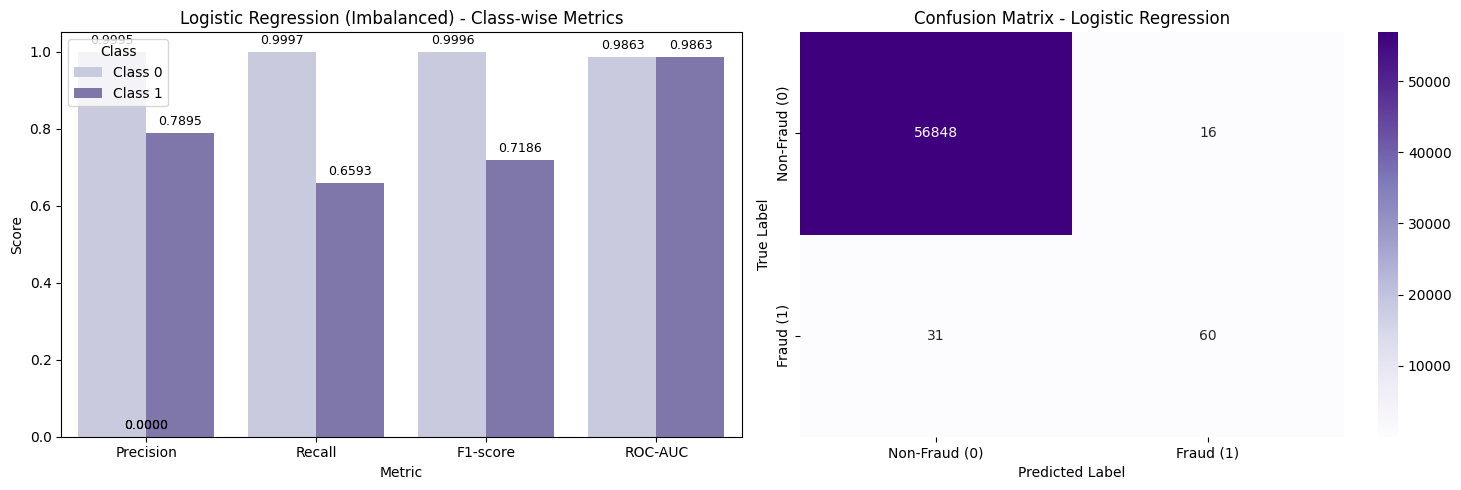

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Class 0': [0.9995, 0.9997, 0.9996, 0.9863],
    'Class 1': [0.7895, 0.6593, 0.7186, 0.9863]
}

df_metrics = pd.DataFrame(metrics_data)

cm = np.array([[56848, 16],
               [31, 60]])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df_melted = df_metrics.melt(id_vars='Metric', var_name='Class', value_name='Score')
bar = sns.barplot(x='Metric', y='Score', hue='Class', data=df_melted, palette='Purples', ax=axes[0])
axes[0].set_ylim(0, 1.05)
axes[0].set_title('Logistic Regression (Imbalanced) - Class-wise Metrics')

for p in bar.patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.02, f'{height:.4f}', ha="center", fontsize=9)

sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', ax=axes[1])
axes[1].set_title('Confusion Matrix - Logistic Regression')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])
axes[1].set_yticklabels(['Non-Fraud (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()


2. 언더샘플링 데이터 버전

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import pandas as pd

#사기/정상 분리
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)

#균형 잡힌 데이터 구성
balanced_df = pd.concat([fraud, normal]).sample(frac=1, random_state=42)

x = balanced_df.drop(columns=['Class'])
y = balanced_df['Class']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)
y_proba = log_reg.predict_proba(x_test)[:, 1]

print("[로지스틱 회귀 - 랜덤 언더샘플링 데이터]")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC-AUC Score")
print(roc_auc_score(y_test, y_proba))



[로지스틱 회귀 - 랜덤 언더샘플링 데이터]
Confusion Matrix
[[93  6]
 [ 7 91]]

Classification Report
              precision    recall  f1-score   support

           0     0.9300    0.9394    0.9347        99
           1     0.9381    0.9286    0.9333        98

    accuracy                         0.9340       197
   macro avg     0.9341    0.9340    0.9340       197
weighted avg     0.9341    0.9340    0.9340       197


ROC-AUC Score
0.9802102659245516


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


원본 데이터보다 수치가 좋게 나온 것을 볼 수 있는데,
이 수치는 로지스틱 회귀 모델을 클래스 균형이 맞춰진 랜덤 언더샘플링 데이터에 학습시킨 결과이다. 전체 데이터 수가 매우 줄어든 상태에서 학습시킨 결과로, 실제 환경과 같은 불균형 상황에서는 동일한 성능을 기대하기 어렵다.

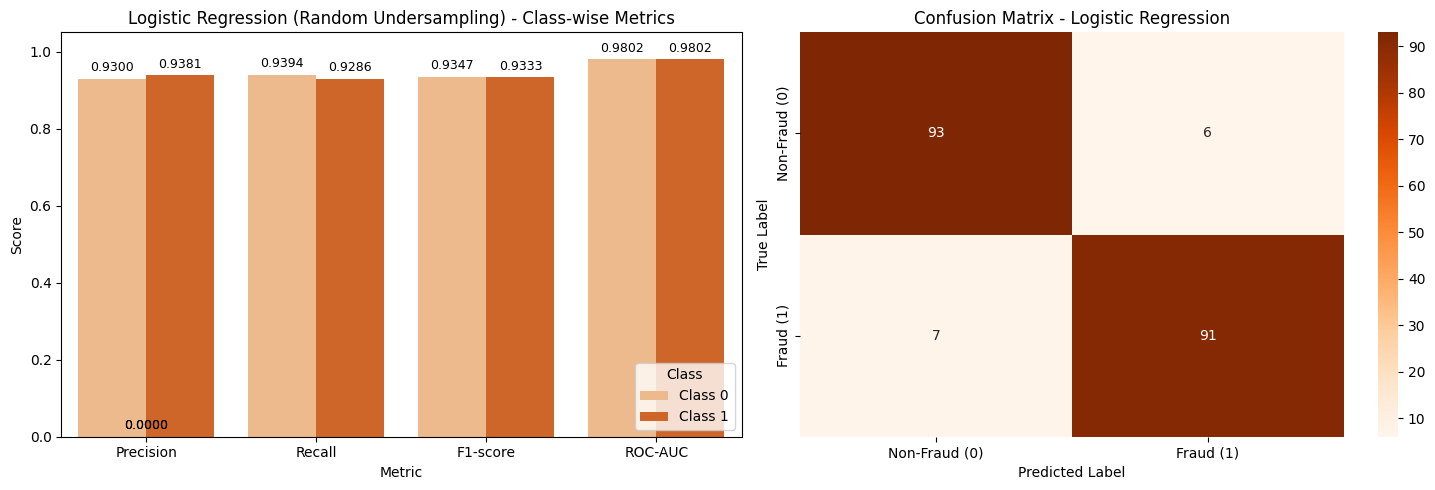

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Class 0': [0.9300, 0.9394, 0.9347, 0.9802],
    'Class 1': [0.9381, 0.9286, 0.9333, 0.9802]
}

df_metrics = pd.DataFrame(metrics_data)

cm = np.array([[93, 6],
               [7, 91]])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df_melted = df_metrics.melt(id_vars='Metric', var_name='Class', value_name='Score')
bar = sns.barplot(x='Metric', y='Score', hue='Class', data=df_melted, palette='Oranges', ax=axes[0])
axes[0].set_ylim(0, 1.05)
axes[0].set_title('Logistic Regression (Random Undersampling) - Class-wise Metrics')

for p in bar.patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.02, f'{height:.4f}', ha="center", fontsize=9)

sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Confusion Matrix - Logistic Regression')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])
axes[1].set_yticklabels(['Non-Fraud (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()


3. 오버 샘플링 데이터 버전

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

#전체 데이터 사용 (Class 불균형 있음)
x = df.drop(columns=['Class'])
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

#SMOTE 오버샘플링 적용 (train 데이터에만)
sm = SMOTE(random_state=42)
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)


log_reg_sm = LogisticRegression(max_iter=1000, random_state=42)
log_reg_sm.fit(x_train_over, y_train_over)


y_pred_over = log_reg_sm.predict(x_test)
y_proba_over = log_reg_sm.predict_proba(x_test)[:, 1]

print("[로지스틱 회귀 - 오버샘플링(SMOTE) 데이터]")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_over))

print("\nClassification Report")
print(classification_report(y_test, y_pred_over, digits=4))

print("\nROC-AUC Score")
print(roc_auc_score(y_test, y_proba_over))


[로지스틱 회귀 - 오버샘플링(SMOTE) 데이터]
Confusion Matrix
[[56094   770]
 [   10    88]]

Classification Report
              precision    recall  f1-score   support

           0     0.9998    0.9865    0.9931     56864
           1     0.1026    0.8980    0.1841        98

    accuracy                         0.9863     56962
   macro avg     0.5512    0.9422    0.5886     56962
weighted avg     0.9983    0.9863    0.9917     56962


ROC-AUC Score
0.9772135341897029


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


smote 방식은 소수 클래스(사기)를 합성해서 데이터 수를 늘리는데 너무 다양한 경계를 만들고 로지스틱 회귀로 직선으로 분리하면 정상 거래도 사기로 잘못 예측하게 된다.
smote가 소수 클래스를 확장했기 때문에 모델이 사기 쪽을 과도하게 예민하게 학습하고 실제 사기를 거의 다 탐지해서 tp값은 높다.

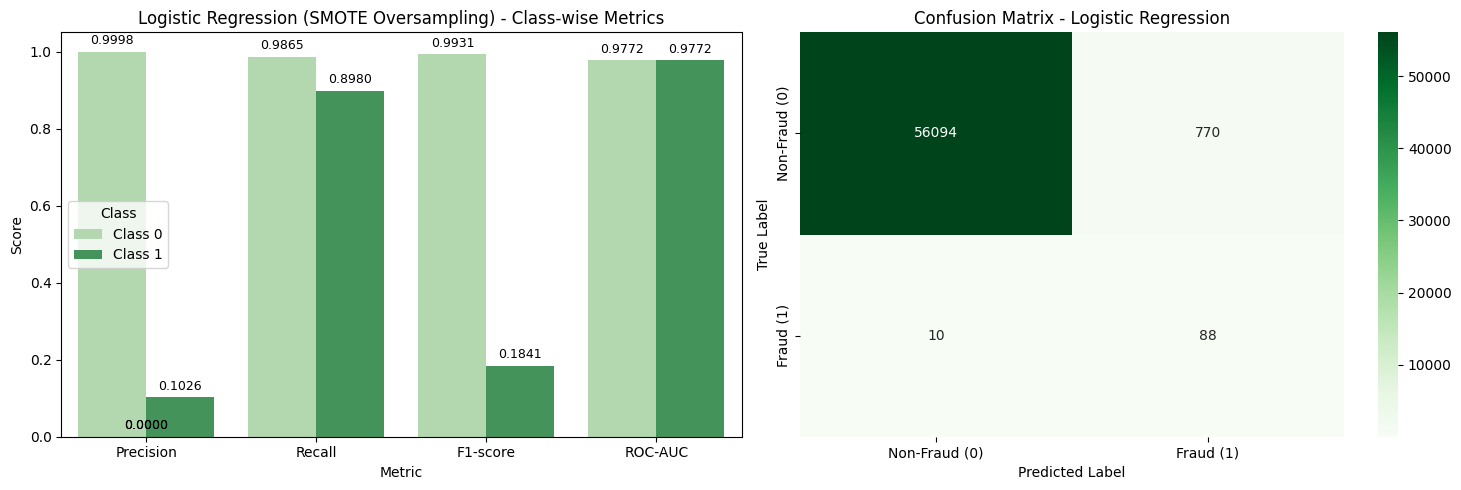

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Class 0': [0.9998, 0.9865, 0.9931, 0.9772],
    'Class 1': [0.1026, 0.8980, 0.1841, 0.9772]
}

df_metrics = pd.DataFrame(metrics_data)

cm = np.array([[56094, 770],
               [10, 88]])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df_melted = df_metrics.melt(id_vars='Metric', var_name='Class', value_name='Score')
bar = sns.barplot(x='Metric', y='Score', hue='Class', data=df_melted, palette='Greens', ax=axes[0])
axes[0].set_ylim(0, 1.05)
axes[0].set_title('Logistic Regression (SMOTE Oversampling) - Class-wise Metrics')

for p in bar.patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.02, f'{height:.4f}', ha="center", fontsize=9)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Logistic Regression')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])
axes[1].set_yticklabels(['Non-Fraud (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()


# **RandomForest 모델 분석**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
y_proba = rf.predict_proba(x_test)[:,1]  # 1(사기)일 확률

print("[Random Forest - 불균형 데이터]")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC-AUC Score")
print(roc_auc_score(y_test, y_proba))


[Random Forest - 불균형 데이터]
Confusion Matrix
[[56861     3]
 [   24    74]]

Classification Report
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9610    0.7551    0.8457        98

    accuracy                         0.9995     56962
   macro avg     0.9803    0.8775    0.9227     56962
weighted avg     0.9995    0.9995    0.9995     56962


ROC-AUC Score
0.9529211480596741


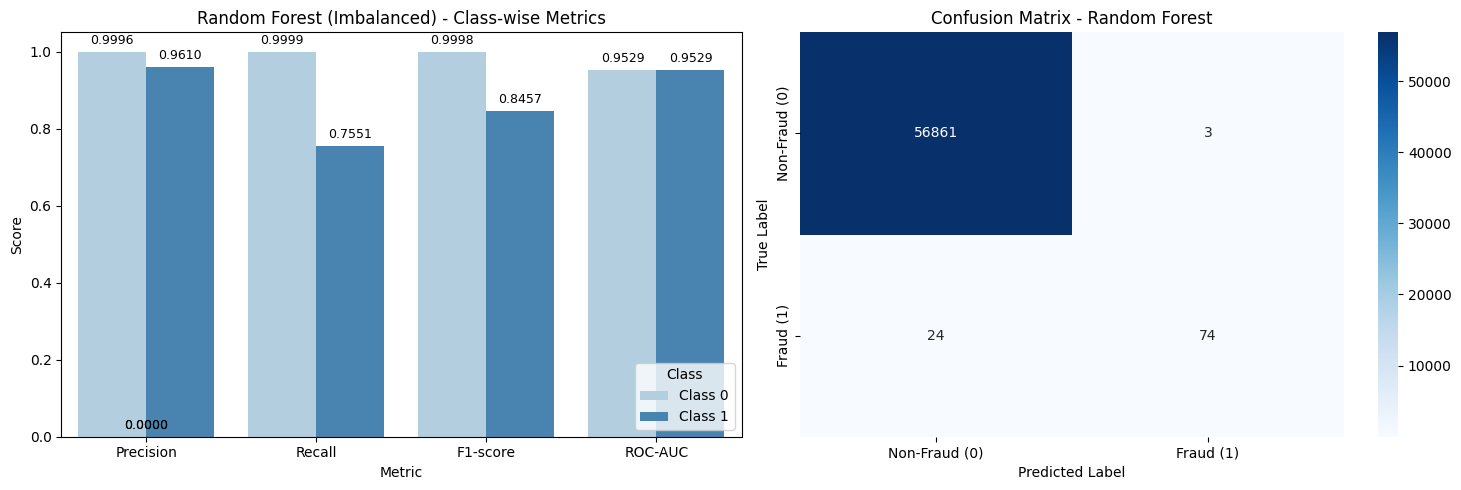

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Class 0': [0.9996, 0.9999, 0.9998, 0.9529],
    'Class 1': [0.9610, 0.7551, 0.8457, 0.9529]
}

df_metrics = pd.DataFrame(metrics_data)

cm = np.array([[56861, 3],
               [24, 74]])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df_melted = df_metrics.melt(id_vars='Metric', var_name='Class', value_name='Score')
bar = sns.barplot(x='Metric', y='Score', hue='Class', data=df_melted, palette='Blues', ax=axes[0])
axes[0].set_ylim(0, 1.05)
axes[0].set_title('Random Forest (Imbalanced) - Class-wise Metrics')

for p in bar.patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.02, f'{height:.4f}', ha="center", fontsize=9)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])
axes[1].set_yticklabels(['Non-Fraud (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()


# **LightGBM 모델 분석**

In [35]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


lgbm = LGBMClassifier(
    n_estimators=1000,
    class_weight='balanced',
    random_state=42
)


lgbm.fit(x_train, y_train)


y_pred = lgbm.predict(x_test)
y_proba = lgbm.predict_proba(x_test)[:,1]

print("[LightGBM - 불균형 데이터]")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC-AUC Score")
print(roc_auc_score(y_test, y_proba))


[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

트리기반 모델은 불균형 데이터에 강하다.
같은 경고가 여러번 나오는 것은 gain이 더이상 나오지 않는 분할일때 발생하는데 어떤 노드도 분할시 성능이 오르지 않는 상태를 의미한다. 특성간의 중복 정보가 많거나 학습이 너무 빨리 끝나면 발생한다.

트리 구조 자체의 특징으로 decision tree는 데이터를 분할하면서 클래스 불균형을 직접 반영할 수 있다. 트리의 각 노드는 정보이득(information gain) 또는 지니 불순도(Gini impurity)를 기준으로 분할되는데 소수 클래스라도 강한 분할 기준이 되면 쉽게 분리된다. 소수 클래스가 특이한 특징을 가지면 금방 그쪽으로 가지를 뻗는다.

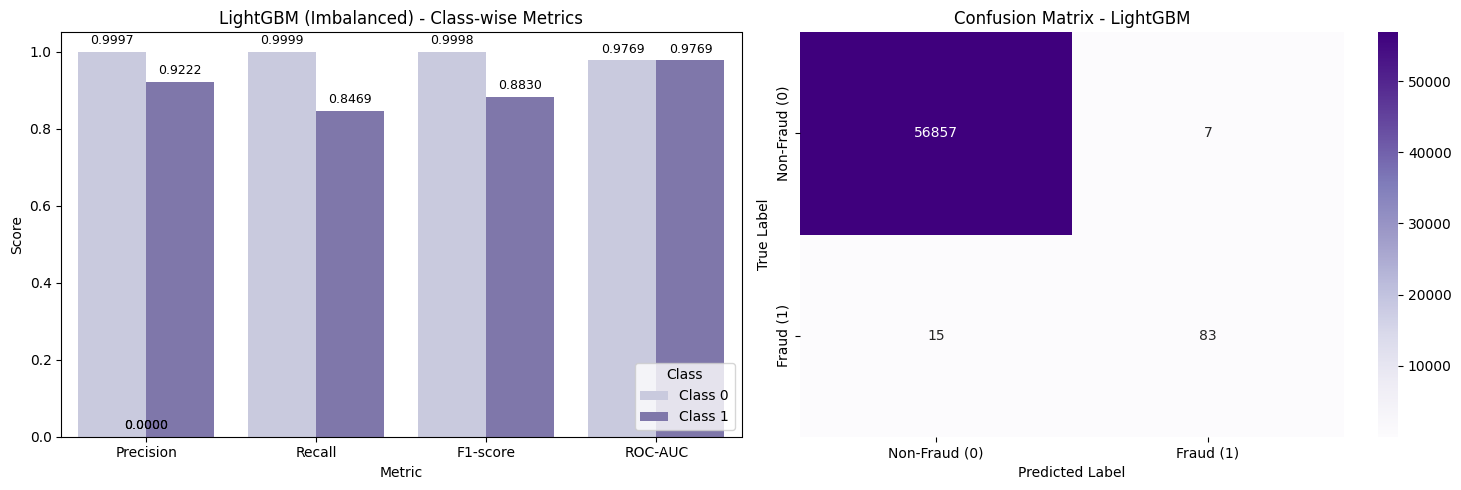

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Class 0': [0.9997, 0.9999, 0.9998, 0.9769],
    'Class 1': [0.9222, 0.8469, 0.8830, 0.9769]
}

df_metrics = pd.DataFrame(metrics_data)

cm = np.array([[56857, 7],
               [15, 83]])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df_melted = df_metrics.melt(id_vars='Metric', var_name='Class', value_name='Score')
bar = sns.barplot(x='Metric', y='Score', hue='Class', data=df_melted, palette='Purples', ax=axes[0])
axes[0].set_ylim(0, 1.05)
axes[0].set_title('LightGBM (Imbalanced) - Class-wise Metrics')

for p in bar.patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.02, f'{height:.4f}', ha="center", fontsize=9)

sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', ax=axes[1])
axes[1].set_title('Confusion Matrix - LightGBM')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])
axes[1].set_yticklabels(['Non-Fraud (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()


# **SVM 모델 학습**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

svm_model = SVC(
        kernel='rbf',
        class_weight='balanced',
        probability=True,
        random_state=42
        )
svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)
y_proba = svm_model.predict_proba(x_test)[:, 1]

print("[SVM - 불균형 데이터]")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC-AUC Score")
print(roc_auc_score(y_test, y_proba))


# **모델별 수치 분석**

**1.Feature Importance**

1. XGBoost – Feature Importance 시각화 (Gain 기준)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_importance(xgb, importance_type='gain', max_num_features=10, title='XGBoost Feature Importance (Gain)', height=0.5)
plt.show()


Feature importance 시각화
각 모델이 학습 과정에서 어떤 변수를 사기 탐지에 중요하다고 판단했는지 분석한 결과이다. 사기 거래에 민감한 변수라는 것은 예측 과정에서 해당 변수를 기준으로 분기를 많이 하고, 그 분기가 모델의 정확도를 크게 개선했다는 의미이다.
데이터에서 사기 거래와 정상 거래 간 차이가 가장 뚜렷하게 나타나는 변수이다.

gain값은 분할 후 얻은 정보 이득의 평균이다. 얼마나 많은 정보 감소를 이 변수로 얻었는지 보여준다.

2. LightGBM – Feature Importance 시각화 (Gain 기준)

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
lgb.plot_importance(lgbm, importance_type='gain', max_num_features=10, title='LightGBM Feature Importance (Gain)', height=0.5)
plt.show()


3. RandomForest – Feature Importance 시각화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
features = x_train.columns
forest_importances = pd.Series(importances, index=features)

plt.figure(figsize=(10, 6))
sns.barplot(x=forest_importances.sort_values(ascending=False).head(10), y=forest_importances.sort_values(ascending=False).head(10).index)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


**2. 모델 예측 확률 시각화**

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

#\ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

#Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, log_reg.predict_proba(x_test)[:,1])

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


첫번째 그래프에서, x축은 정상거래를 잘못 사기라고 판단한 비율,
y축은 실제 사기를 사기로 잘 맞춘 비율이다.
auc값이 1에 가까울수록 성능이 뛰어난 모델이다.

두번째 그래프에서, x축은 실제 사기를 얼마나 잘 맞췄는지,
y축은 사기라고 예측한 것들 중 실제로 사기였던 비율을 의미한다.
곡선이 오른쪽에 머물수록 높은 정밀도와 높은 재현율을 동시에 만족하고 있다는 뜻이다.

# **모델 앙상블**

단일 모델을 학습했기 때문에 이 결과들을 앙상블 기법을 활용하여 성능을 향상시킬 수 있다. 3개의 모델이 트리기반 모델이기때문에 soft voting기법을 적용할 것이다.
soft voting은 각 모델의 에측 확률 평균을 사용한다.

1. Soft voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('log_reg',log_reg),
        ('rf', rf)
    ],
    voting='soft'
)

voting_clf.fit(x_train, y_train)

y_pred = voting_clf.predict(x_test)
y_proba = voting_clf.predict_proba(x_test)[:, 1]

print("[Voting Ensemble - Soft Voting]")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC-AUC Score")
print(roc_auc_score(y_test, y_proba))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Class 0': [0.9997, 0.9999, 0.9998, 0.9698],
    'Class 1': [0.9310, 0.8265, 0.8757, 0.9698]
}

df_metrics = pd.DataFrame(metrics_data)

cm = np.array([[56858, 6],
               [17, 81]])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df_melted = df_metrics.melt(id_vars='Metric', var_name='Class', value_name='Score')
bar = sns.barplot(x='Metric', y='Score', hue='Class', data=df_melted, palette='Reds', ax=axes[0])
axes[0].set_ylim(0, 1.05)
axes[0].set_title('Voting Ensemble (Soft) - Class-wise Metrics')

for p in bar.patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.02, f'{height:.4f}', ha="center", fontsize=9)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('Confusion Matrix - Voting Ensemble (Soft)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])
axes[1].set_yticklabels(['Non-Fraud (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 앙상블 대상 모델 정의
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('rf', rf)
    ],
    voting='soft'  # soft voting은 predict_proba 기반
)

voting_clf.fit(x_train, y_train)

y_pred = voting_clf.predict(x_test)
y_proba = voting_clf.predict_proba(x_test)[:, 1]

print("[Voting Ensemble - Soft Voting]")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC-AUC Score")
print(roc_auc_score(y_test, y_proba))


soft voting은 평균값이기 떄문에 강한 모델이 희석될 가능성이 있다.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('log_reg',log_reg)
    ],
    voting='soft'
)

voting_clf.fit(x_train, y_train)

y_pred = voting_clf.predict(x_test)
y_proba = voting_clf.predict_proba(x_test)[:, 1]

print("[Voting Ensemble - Soft Voting]")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC-AUC Score")
print(roc_auc_score(y_test, y_proba))

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb),
        ('lgbm', lgbm),
    ],
    voting='soft'
)

voting_clf.fit(x_train, y_train)

y_pred = voting_clf.predict(x_test)
y_proba = voting_clf.predict_proba(x_test)[:, 1]

print("[Voting Ensemble - Soft Voting]")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC-AUC Score")
print(roc_auc_score(y_test, y_proba))

# **partial dependence plot(PDP)**

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt


features_to_plot = ['V14', 'V12', 'V10']

plt.figure(figsize=(12, 4))

PartialDependenceDisplay.from_estimator(
    xgb,
    X=x_train,
    features=features_to_plot,
    kind='average',
    grid_resolution=50,
)
plt.tight_layout()
plt.show()


pdp는 특정 변수의 값이 변화할 때 다른 변수는 고정한 상태에서 해당 변수 하나가 예측 확률에 어떤 영향을 미치는지를 보여주는 도구이다.
1. V14

그래프에서 x축은 v14의 값, y축은 partial dependence값 즉 사기일 확률을 나타낸다. v14가 감소할수록 partial dependence값은 증가한다는 것은 값이 작아질수록 해당 거래가 사기일 가능성이 높다고 판단하는 것이다. 실제 데이터에서도 v14는 낮은 값을 가지는 경향을 보였고, 상관계수도 절댓값 기준으로 가장 높았다.
2. V12

이 변수도 v14와 유사한 경향을 보인다. 그러나 중간에 약간 평탄한 구간이 있다가 급격히 하강하는 구간이 있는데 이는 모델이 특정 범위의 v12 값에서는 사기 가능성을 비교적 평탄하게 유지하다가 임계값을 넘을 경우 급격하게 판단을 바꾸는 것을 의미한다.
3. v10

이 변수는 앞의 두 변수보다 평탄한 분포를 가지며 영향력이 높지 않은 편이다. v12와 비슷한 경향을 보인다.

수치를 분석하는데 있어서 중요하게 보는 지표는 recall과 roc-auc이다. 이 프로젝트는 사기거래를 탐지하는 것이 목표이다. precision은 lightgbm이 더 높지만, recall값이 더 중요하게 판단되므로 xgboost가 우선시된다.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Model': ['XGBoost', 'LightGBM', 'Voting Ensemble'],
    'Precision': [0.8925, 0.9222, 0.9310],
    'Recall':    [0.9121, 0.8469, 0.8265],
    'F1-score':  [0.9022, 0.8830, 0.8757],
    'ROC-AUC':   [0.9943, 0.9769, 0.9698]
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model', palette='Greens')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=9)

plt.ylim(0, 1.05)
plt.title('Top 3 Models - Performance Comparison', fontsize=14)
plt.ylabel('Score')
plt.legend(title='Model')
plt.tight_layout()
plt.show()
